# Problem Statement
### Spatial-temporal distribution of bikeshare trips of 2022 for the city of Chicago, USA.


# Introduction
Chicago is known for being a bike-friendly city, with investments in bike infrastructure such as protected and shared bike lanes, off-street paths, and bike parking facilities. Divvy is a bike-sharing system that serves the Chicago and Evanston area, providing a convenient, affordable, and fun transportation option for getting around the city. The program is run by the Chicago Department of Transportation (CDOT) and initially funded by federal grants and the City's Tax Increment Financing program. In 2016, the program expanded to Evanston with a grant from the State of Illinois.

# Description of Data
This project involves analyzing historical bike trip data from Divvy, which is a bike-sharing program run by the Chicago Department of Transportation. The data for this project will be from the year 2022 and will be gathered from 12 datasets that are available, covering the months from January 2022 to December 2022. Each dataset is in the form of a CSV file and contains information about every ride logged by Divvy customers. The goal is to use this data to identify trends and gain insights. 

All the datasets were collected from this website: (https://divvy-tripdata.s3.amazonaws.com/index.html). The datasets were then megred into a single dataset named 'master_data'. 

# Data Preprocessing and Data Cleaning

### Importing necessary Python Packages, Libraries and Divvy Datset 2022

In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import requests
import seaborn as sns
import glob

import json
import os

dataset = pd.read_csv('C:\\Users\\ASUS\\PycharmProjects\\pythonProject1\\master_data.csv')
dataset

Unnamed: 0           ride_id  rideable_type           started_at  \
0                 0  C2F7DD78E82EC875  electric_bike  2022-01-13 11:59:47   
1                 1  A6CF8980A652D272  electric_bike  2022-01-10 08:41:56   
2                 2  BD0F91DFF741C66D   classic_bike  2022-01-25 04:53:40   
3                 3  CBB80ED419105406   classic_bike  2022-01-04 00:18:04   
4                 4  DDC963BFDDA51EEA   classic_bike  2022-01-20 01:31:10   
...             ...               ...            ...                  ...   
5667712      181801  43ABEE85B6E15DCA   classic_bike  2022-12-05 06:51:04   
5667713      181802  F041C89A3D1F0270  electric_bike  2022-12-14 17:06:28   
5667714      181803  A2BECB88430BE156   classic_bike  2022-12-08 16:27:47   
5667715      181804  37B392960E566F58   classic_bike  2022-12-28 09:37:38   
5667716      181805  2DD1587210BA45AE   classic_bike  2022-12-09 00:27:25   

                    ended_at             start_station_name start_station_id  \
0        2022-01-13 12:02:44       Glenwood Ave & Touhy Ave              525   
1        2022-01-10 08:46:17       Glenwood Ave & Touhy Ave              525   
2        2022-01-25 04:58:01  Sheffield Ave & Fullerton Ave     TA1306000016   
3        2022-01-04 00:33:00       Clark St & Bryn Mawr Ave     KA1504000151   
4        2022-01-20 01:37:12    Michigan Ave & Jackson Blvd     TA1309000002   
...                      ...                            ...              ...   
5667712  2022-12-05 06:54:48  Sangamon St & Washington Blvd            13409   
5667713  2022-12-14 17:19:27        Bernard St & Elston Ave            18016   
5667714  2022-12-08 16:32:20      Wacker Dr & Washington St     KA1503000072   
5667715  2022-12-28 09:41:34  Sangamon St & Washington Blvd            13409   
5667716  2022-12-09 00:35:28   Southport Ave & Waveland Ave            13235   

                      end_station_name end_station_id  start_lat  start_lng  \
0                 Clark St & Touhy Ave         RP-007  42.012800 -87.665906   
1                 Clark St & Touhy Ave         RP-007  42.012763 -87.665967   
2        Greenview Ave & Fullerton Ave   TA1307000001  41.925602 -87.653708   
3            Paulina St & Montrose Ave   TA1309000021  41.983593 -87.669154   
4               State St & Randolph St   TA1305000029  41.877850 -87.624080   
...                                ...            ...        ...        ...   
5667712       Peoria St & Jackson Blvd          13158  41.883165 -87.651100   
5667713         Seeley Ave & Roscoe St          13144  41.949980 -87.714019   
5667714          Green St & Madison St   TA1307000120  41.883143 -87.637242   
5667715       Peoria St & Jackson Blvd          13158  41.883165 -87.651100   
5667716         Seeley Ave & Roscoe St          13144  41.948150 -87.663940   

           end_lat    end_lng member_casual  
0        42.012560 -87.674367        casual  
1        42.012560 -87.674367        casual  
2        41.925330 -87.665800        member  
3        41.961507 -87.671387        casual  
4        41.884621 -87.627834        member  
...            ...        ...           ...  
5667712  41.877642 -87.649618        member  
5667713  41.943403 -87.679618        member  
5667714  41.881859 -87.649264        member  
5667715  41.877642 -87.649618        member  
5667716  41.943403 -87.679618        casual  

[5667717 rows x 14 columns]

#### The divvy dataset file contains 13 variables:

1. ride_id: Unique ID assigned with each ride
2. rideable_type: Type of bicycle used on each ride — classic, docked, or electric
3. started_at: Date and time at the start of each trip
4. ended_at: Date and time at the end of each trip
5. start_station_name: Name of the station where each journey started from
6. start_station_id: ID of the station where each journey started from
7. end_station_name: Name of the station where each trip ended at
8. end_station_id: ID of the station where each trip ended at
9. start_lat: Latitude of each starting station
10. start_lng: Longitude of each starting station
11. end_lat: Latitude of each ending station
12. end_lng: Longitude of each ending station
13. member_casual: Type of membership of each rider

### Vewing the data type and searhing for null values and empty cells in the dataset

In [2]:
print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 605.4+ MB
None
Unnamed: 0                 0
ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0


### Remong rows having the null values and empty cells

In [3]:
dataset = dataset.dropna(how='any',axis=0)
print("Null values removed successfully.")
print(dataset.isnull().sum())
print(dataset.duplicated().any())

Null values removed successfully.
Unnamed: 0            0
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64
False


### Changing the datatype of started_at and ended_at variable to 'datetime' format
To calculate the duration of each ride, started_at and ended_at variables were used. However, these variables are in object format, so they needed to be converted to date and time format using the to_datetime() function from the Pandas library. Once they are in the correct format, the started_at variable can be subtracted  from the ended_at variable to determine the duration of each ride. Additionally, these variables can be used to calculate which days of the week and time of day users take rides to gain further insights from the dataset.

In [4]:
pd.options.mode.chained_assignment = None

dataset["started_at"] = pd.to_datetime(dataset["started_at"])
dataset["ended_at"] = pd.to_datetime(dataset["ended_at"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 0 to 5667716
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 500.0+ MB


In [5]:
dataset["start_hour"] = dataset["started_at"].dt.hour
dataset["start_hour"].unique()
dataset['Date'] = dataset['started_at'].apply(lambda x: x.strftime('%Y-%m-%d'))

### Computing the trip duration in minutes

In [6]:
dataset["start_day_num"] = dataset["started_at"].dt.dayofweek
day_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
dataset["start_day_name"]= dataset["start_day_num"].apply(lambda y:day_dict[y])

dataset["day_of_year"] = dataset["started_at"].dt.day_of_year

dataset['start_month_num'] = dataset['started_at'].dt.month
dataset["start_month_num"].unique()

month_dict = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
dataset["start_month_name"]= dataset["start_month_num"].apply(lambda y:month_dict[y])
dataset["start_month_name"].unique()

dataset['Quarter'] = dataset['started_at'].apply(lambda x: int((int(x.strftime('%m')) - 1) / 3) + 1)

dataset['start_year'] = dataset['started_at'].dt.year
dataset["start_year"].unique()

dataset["trip_duration"] = dataset["ended_at"] - dataset["started_at"]
dataset["trip_duration"] = pd.to_numeric(dataset["trip_duration"])/6e+10
dataset["trip_duration"].describe(include = "all")

count    4.369360e+06
mean     1.709517e+01
std      4.786735e+01
min     -1.687000e+02
25%      6.050000e+00
50%      1.060000e+01
75%      1.901667e+01
max      3.435407e+04
Name: trip_duration, dtype: float64

### Start time, End Time and 10 Largest Trip duration (minutes) of trips

In [7]:
trip_mins = dataset[["started_at", "ended_at", "trip_duration"]]
trip_mins.nlargest(10, ["trip_duration"])

started_at            ended_at  trip_duration
286843  2022-03-05 19:08:58 2022-03-29 15:43:02   34354.066667
2996193 2022-07-04 18:37:11 2022-07-27 00:32:38   32035.450000
47709   2022-01-01 01:00:05 2022-01-21 08:51:11   29271.100000
23249   2022-01-06 19:07:45 2022-01-25 14:30:33   27082.800000
61039   2022-01-13 17:44:13 2022-01-23 15:02:19   14238.100000
364947  2022-03-23 06:01:59 2022-04-01 22:10:12   13928.216667
142287  2022-02-08 19:21:13 2022-02-16 09:07:11   10905.966667
2290690 2022-07-10 18:52:42 2022-07-18 06:59:55   10807.216667
1046885 2022-05-09 10:58:35 2022-05-16 21:41:33   10722.966667
365478  2022-03-17 13:38:08 2022-03-24 14:24:19   10126.183333

### Removing Outliers and inconsistent values of Trip Duration
It was found that some values in the trip_duration variable were inconsistent, such as when Quality Control took the bikes out of circulation, or when the trip duration was longer than 500 minutes. Trip duration smaller than 2 minutes and larger than 500 minutes are deleted using the drop() function from the Pandas library (Suzanne Maas et. al., 2020)

In [8]:
outliers_trip_duration = (dataset["trip_duration"] < 2) | (dataset["trip_duration"] > 500)
print(outliers_trip_duration.value_counts())
dataset.drop(dataset.index[outliers_trip_duration], inplace = True)
trip_mins = dataset[["started_at", "ended_at", "trip_duration"]]
trip_mins.nlargest(10, ["trip_duration"])

False    4221209
True      148151
Name: trip_duration, dtype: int64


started_at            ended_at  trip_duration
2445791 2022-07-31 19:22:44 2022-08-01 03:42:41     499.950000
5313998 2022-11-13 02:54:17 2022-11-13 11:14:12     499.916667
2343932 2022-07-30 13:42:56 2022-07-30 22:02:41     499.750000
3727407 2022-08-15 08:43:48 2022-08-15 17:03:18     499.500000
934749  2022-05-07 00:57:24 2022-05-07 09:16:32     499.133333
1554746 2022-06-09 20:06:51 2022-06-10 04:25:50     498.983333
2051362 2022-06-22 22:33:44 2022-06-23 06:52:33     498.816667
925808  2022-05-21 22:38:32 2022-05-22 06:57:09     498.616667
4426542 2022-09-17 01:51:48 2022-09-17 10:10:18     498.500000
1806061 2022-06-13 23:52:20 2022-06-14 08:10:22     498.033333

### Computing the trip distance in kilometers (km)
To calculate the trip distance, we will use the GPS coordinates of the starting and ending stations. Haversine formula was used for determining the great-circle distance between two points on a sphere in kilometers. This way, the trip distance can be obtained by combining the starting and ending stations' GPS coordinates.

In [9]:
def haversine(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return 6371 * 2 * np.arcsin(np.sqrt(a))

dataset['trip_distance'] = haversine(dataset['start_lat'],dataset['start_lng'],dataset['end_lat'],dataset['end_lng'])

### Average Trip Duration and Trip Distance
Average trip duration of all trips of 2022 is approximately 17 minutes and average trip distance is around 2.5 kilometers.

In [10]:
mean_trip_duration = dataset["trip_duration"].mean()
mean_trip_distance = dataset["trip_distance"].mean()
print(mean_trip_duration)
print(mean_trip_distance)

16.958173843087103
2.169127398504652


### Modified and newly added data types in the dataset

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4221209 entries, 0 to 5667716
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
 14  start_hour          int64         
 15  Date                object        
 16  start_day_num       int64         
 17  start_day_name      object        
 18  day_of_year         int64         
 19  start_month_num     int64         
 20  st

### Total number of Trips at each month of 2022
It can be seen that maximum number of trips occured during the middle of the year (June-August) which is approximately 600000 trips per month and the maximums trips occured in the month of July. There could be several reasons why bike trips in Chicago are greater in July. Some possible explanations include:

Weather: July is typically one of the warmest months in Chicago, with comfortable temperatures and less chance of rain or snow, which may make it more appealing for people to take bike trips.

Tourism: July is a peak tourist season in Chicago, which could lead to an increase in bike trips as visitors explore the city on two wheels.

School breaks: Many schools in Chicago are out for the summer in July, which means more people may have free time to go for bike rides.

Popular events: There are many popular events in Chicago in July, such as the Taste of Chicago, which could attract more people to the city and lead to an increase in bike trips.

Community events: Many community events like street festivals, farmers markets and other public events are also taking place in July which may also contribute to more bike trips.

It's worth noting that these are all just possible explanations and the actual reason for the increase in bike trips in July may be a combination of multiple factors.

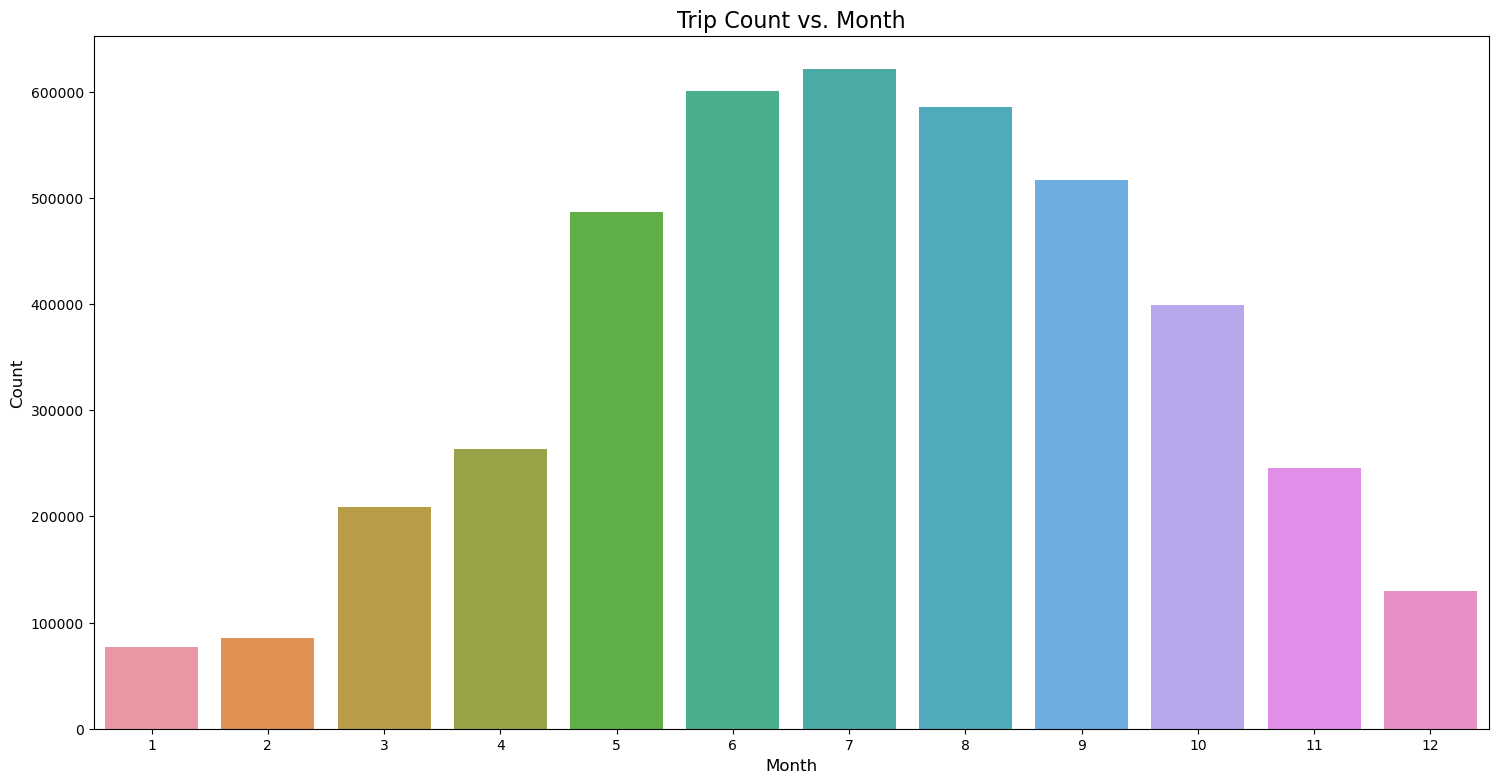

In [12]:
# Trip distribution
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(x='start_month_num', data=dataset, ax=ax)
ax.set_title('Trip Count vs. Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

### Total number of Trips at each weekday of 2022
It can be seen that maximum number of trips occured during Friday, the day before weekend. It is possible that the increase in bike trips on Fridays could be related to people using bike-sharing as a form of transportation to get to and from work or school. Fridays may see an increase in bike trips as people use the service to commute or head out for the weekend. Additionally, events and social activities on Friday night may also contribute to the increase in bike trips. Maybe, at the end of week, many people make recreational trips which increases the trip count on Friday.

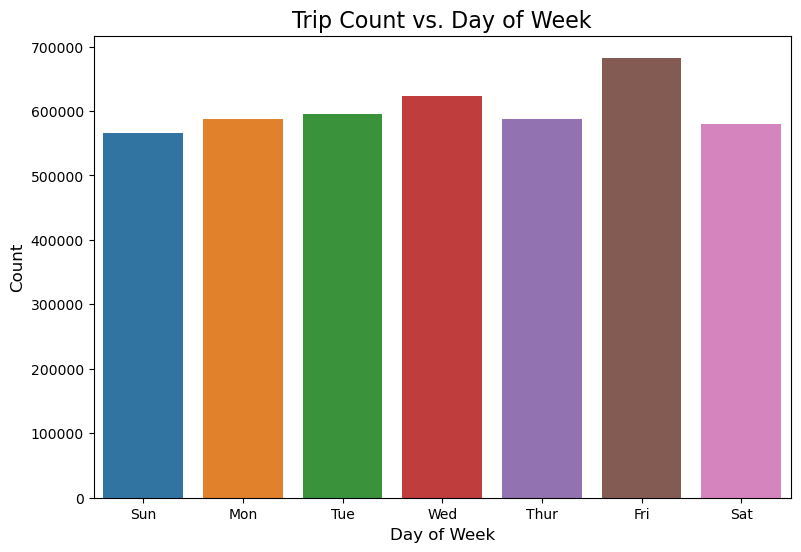

In [13]:
# Trip distribution
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x='start_day_num', data=dataset, ax=ax)
ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'))
ax.set_title('Trip Count vs. Day of Week', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

### Total number of Trips at each hour of day of 2022
From the count plot, it can be seen that the number of trips increases from 4 AM to 8 AM and then suddenly drops. The bike trips around 8 AM is much because this time period is typically when people are starting their work or school day and are commuting to their destinations. During this time, many people may be using bike-sharing as a means of transportation to get to work or school. Additionally, this time period could also be associated with people using bike-sharing for other activities such as running errands or exercising before starting their day.

The number of trips gradually increase from 9 AM and takes a peak at 5 PM, which is the evening peak. The flow is highest  around 5 pm because this time period is typically when people are finishing up work or school for the day and are commuting home. During this time, many people may be using bike-sharing as a means of transportation to get home from their destinations. Additionally, this time period could also be associated with increased leisure activities, as people may be using bike-sharing to engage in other activities after work or school.

Additionally, it's worth mentioning that many people use bike-sharing as a first/last mile solution, which means they use it to get to a bus/train station or to get home after a bus/train ride. So, it could be that more people use bike-sharing during this time period to connect to public transportation.

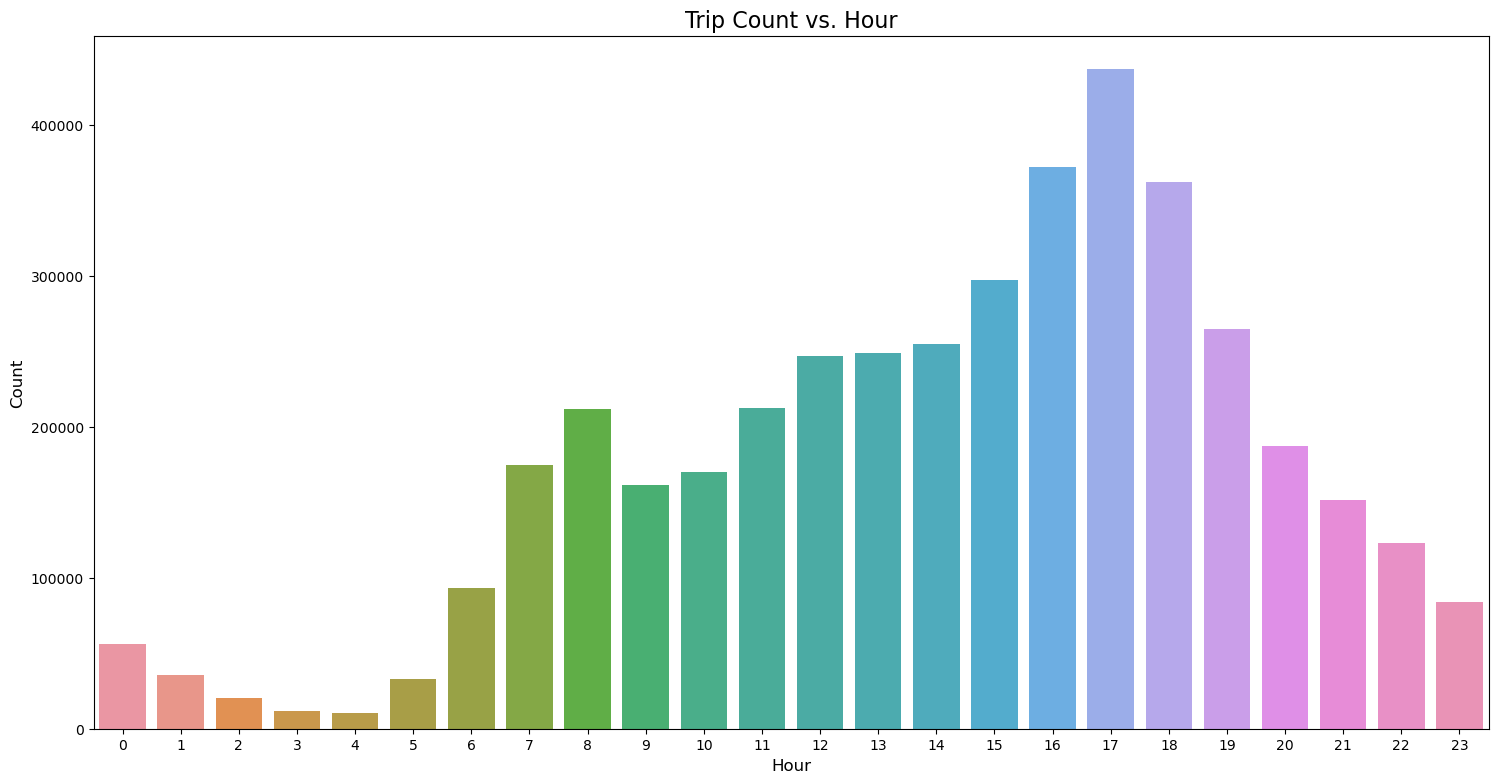

In [14]:
# Trip distribution
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(x='start_hour', data=dataset, ax=ax)
ax.set_title('Trip Count vs. Hour', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

### HeatMap: Total number of Trips vs. (day and hour) of 2022
From the heatmap, it can be seen that maximum number of trips occured from 4 PM to 5 PM (17th hour) during Monday, Tuesday and Wednesday. This might also be because people are more likely to use bike-sharing for commuting on weekdays, rather than on weekends.

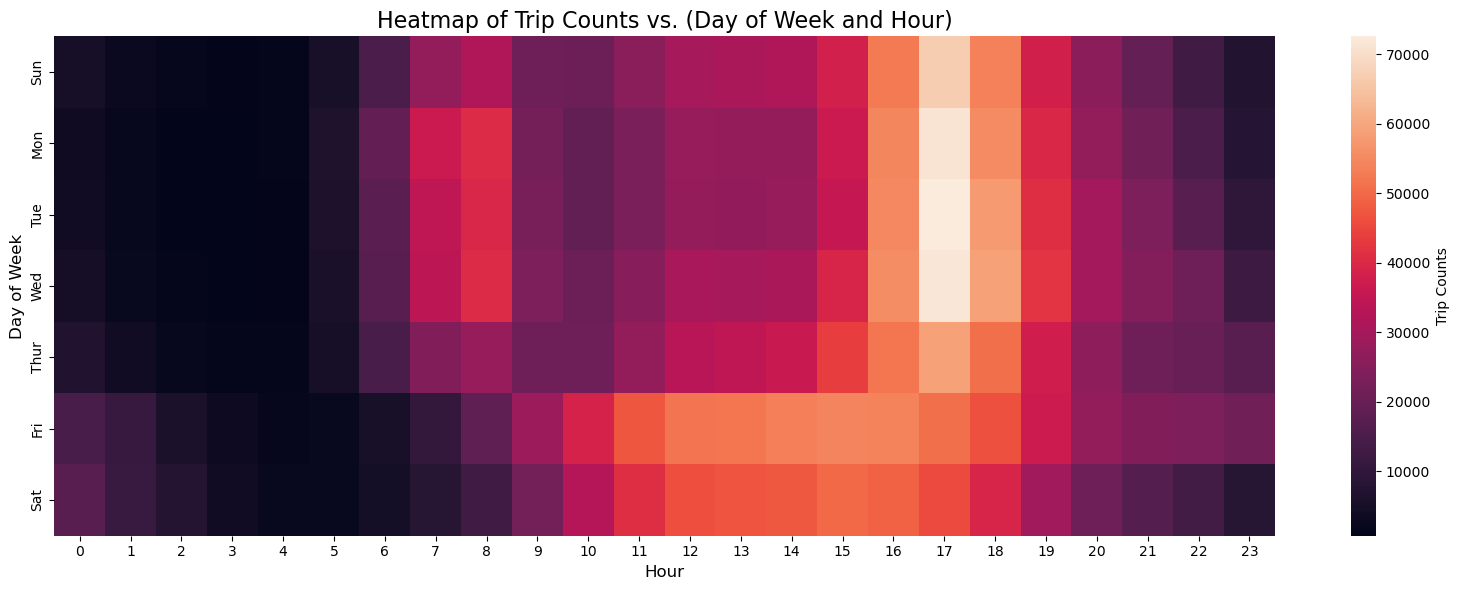

In [15]:
# heatmap of trip count vs. (day and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = dataset[['start_day_num', 'start_hour', 'trip_duration']].groupby(['start_day_num', 'start_hour']).count().reset_index()
pivots = tmp.pivot('start_day_num', 'start_hour', 'trip_duration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Trip Counts vs. (Day of Week and Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ), fontsize=10)
plt.tight_layout()
plt.show()

### Total number of Trips vs. (User Type and Type of Bike) of 2022
There are two types of membership for the bike users,
1. Member: Users having annual membership
2. Casual: Users having 24-hour pass

From the count of Trip Count vs. User Type, it can be seen that maximum users in the year 2022 are Member having annual membership. The number of 'Member' users is approximately 1.5 times the number of 'Casual' users. It might be because the membership program offered by Divvy provides more incentives for regular users. These incentives may include lower costs for trips, access to a larger number of bikes and stations, and the ability to reserve bikes in advance. Additionally, membership programs may offer discounts or other benefits for frequent users, which can make it more appealing for people to become members.

Another reason could be that member users are more likely to be residents of the city, and thus more likely to use the bike-sharing service on a regular basis for commuting, running errands, or leisure activities, whereas casual users may be tourists or visitors who are more likely to use the service for shorter trips or for specific events.

Additionally, it could be that the Member user population is more likely to be of a certain demographic, such as urban dwellers, who are more likely to use bike-sharing as a transportation option, while casual users may be more likely to be tourists or visitors who are in the city for a shorter period of time.

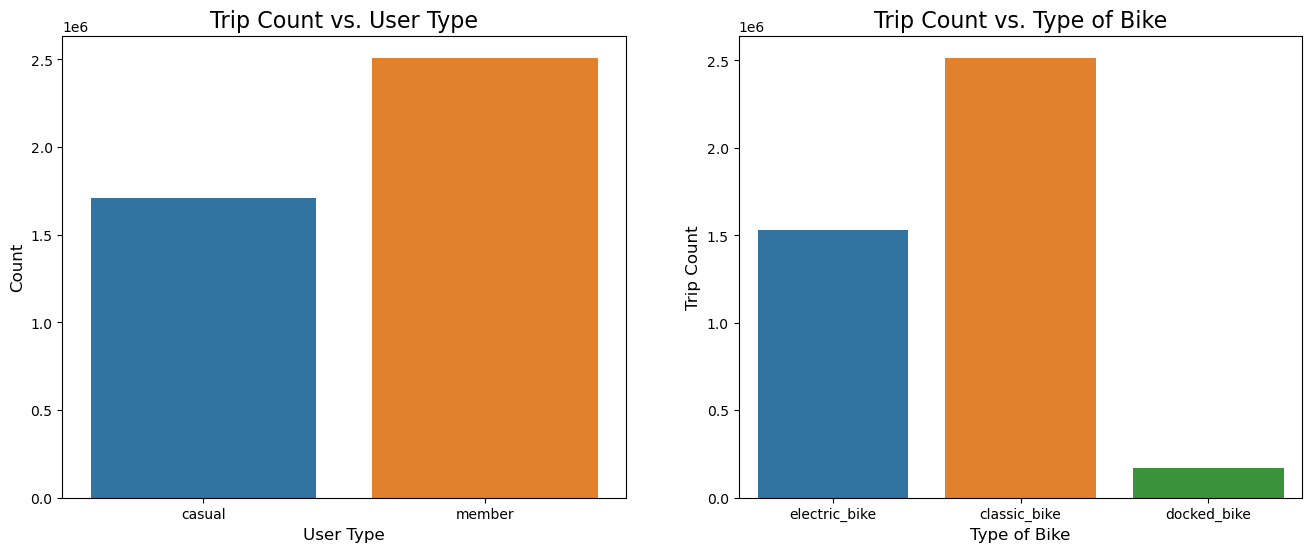

In [16]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='member_casual', data=dataset, ax=ax[0])
ax[0].set_title('Trip Count vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.countplot(x='rideable_type', data=dataset, ax=ax[1])
ax[1].set_title('Trip Count vs. Type of Bike', fontsize=16)
ax[1].set_xlabel('Type of Bike', fontsize=12)
ax[1].set_ylabel('Trip Count', fontsize=12)
plt.show()

There are three types of bike: Electric, Classic and Docked. The reason why classic bikes are used more than electric and docked bikes in Chicago could be because classic bikes are more widely available and accessible to riders. They are the most common type of bike in the Divvy fleet and are likely to be located at more docking stations throughout the city. This makes it more convenient for riders to find and rent a classic bike, compared to electric or docked bikes which may be located at fewer stations.

Another reason could be that classic bikes are more affordable for riders, especially for those who are taking longer trips or using the service on a regular basis. Electric and docked bikes may have additional costs, such as higher rental fees or usage charges, that make them less appealing to some riders.

Additionally, it could be that the majority of the riders are not familiar or not interested in using electric or docked bike. They may prefer the traditional bike riding experience and/or may not feel the need for the added features of an electric or docked bike.

### Density Distribution of the Trip Duration (minutes)
It can be seen that, maximum number of trips of 2022 has a trip duration less than 100 minutes as the density plot almost flattens after this moment.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


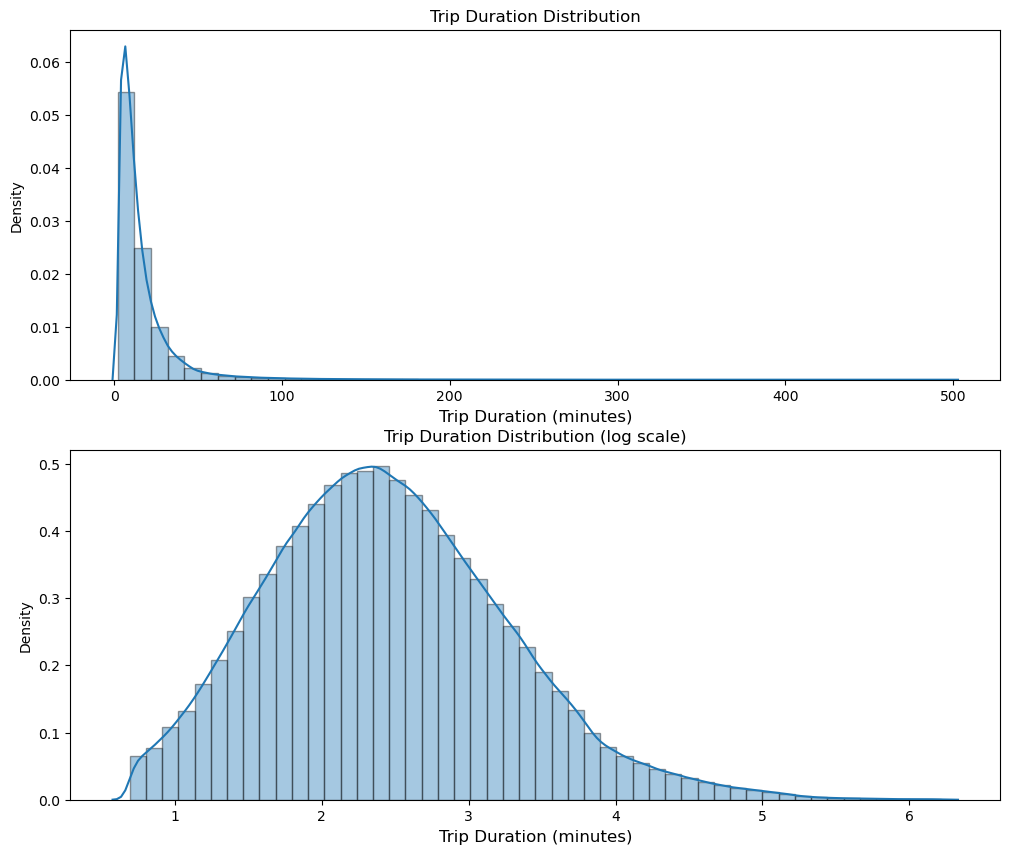

In [17]:
# Trip distribution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(dataset['trip_duration'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(dataset['trip_duration']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

### Number of Member/Casual trips at each day of the week of every quarter of year 2022
Despite the Friday and Saturday of April-June and July-September quarter, the total number of 'Member' trips is always larger than that of 'Casual' trips for every day of the week. There are likely multiple factors that contribute to the increased number of casual bike trips in Chicago on Fridays and Saturdays from April to September. One possible explanation is that people have more free time on the weekends, and may be more likely to take a leisurely bike ride. Additionally, the warmer weather during this time of year may also make it more pleasant to be outside and engage in outdoor activities like biking. Also, the maximum number of trips occured between July to September which is the warmest time of the year and suitable for biking.

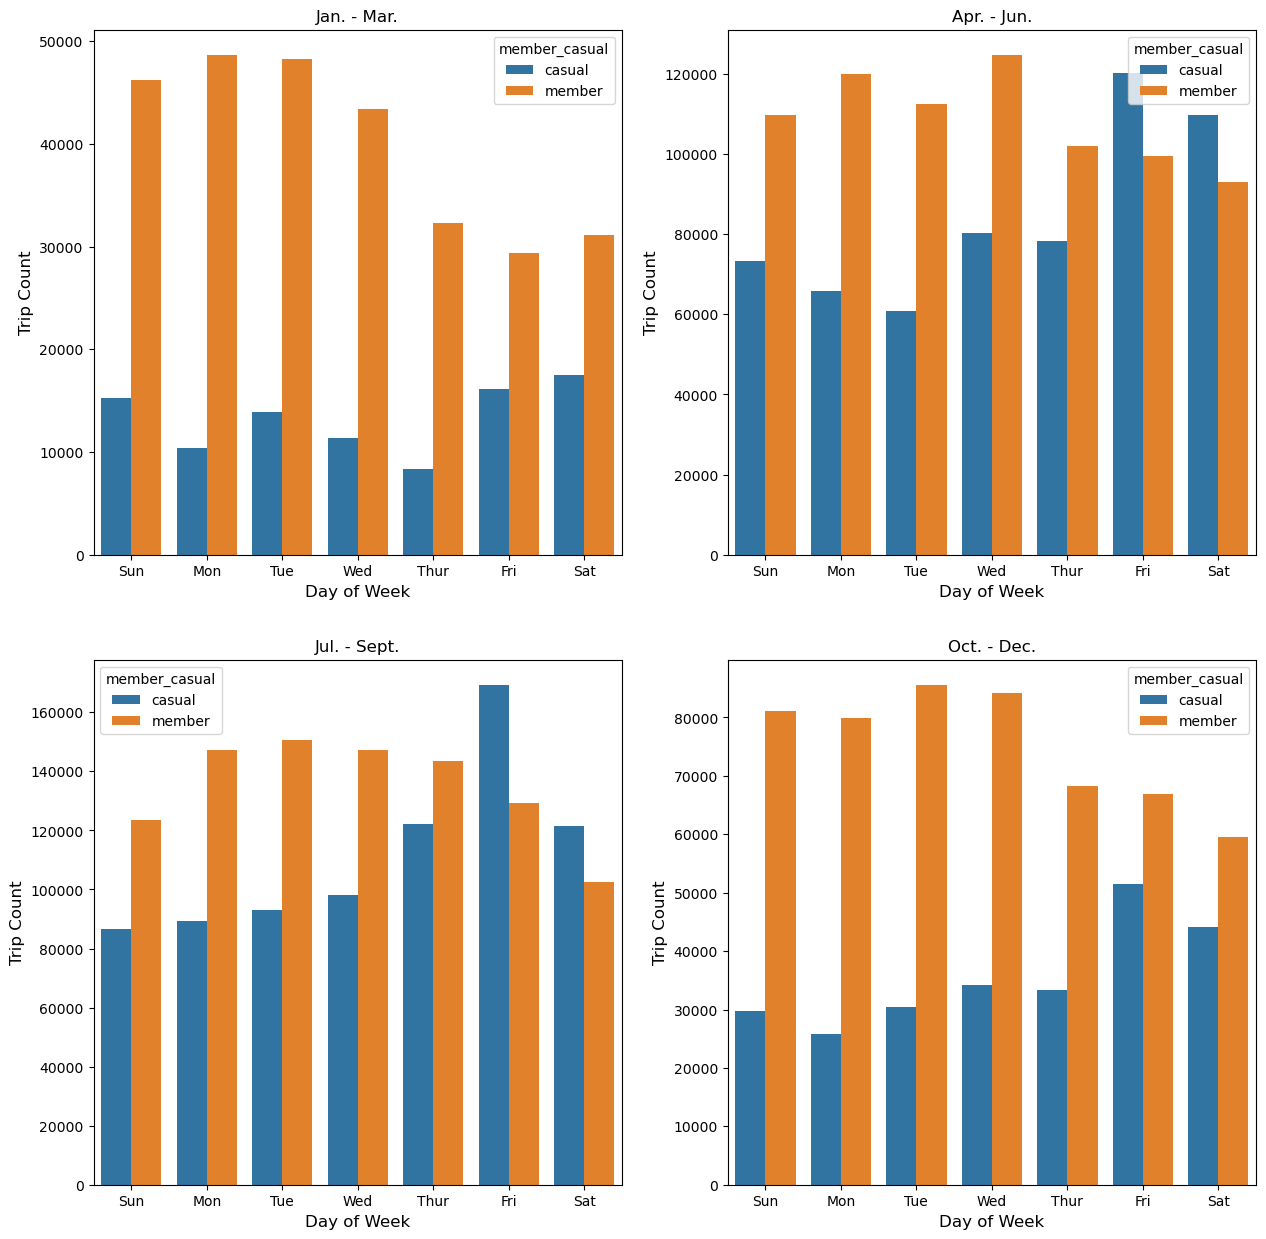

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the 2D axes array for ease of looping
axes = np.array(axes).flatten()

# Prepare the month description titles for each quarter
quarter_names = ['Jan. - Mar.', 'Apr. - Jun.', 'Jul. - Sept.', 'Oct. - Dec.']

for q, ax in zip(sorted(dataset['Quarter'].unique()), axes):
    ax.set_title(quarter_names[(q-1)])
    
    sns.barplot(x='start_day_num', y='ride_id', hue='member_casual',
    data=dataset[dataset['Quarter']==q].groupby(['start_day_num', 'member_casual'])['ride_id'].count().reset_index(), ax=ax)
    ax.set_xlabel('Day of Week', fontsize=12)
    ax.set_ylabel('Trip Count', fontsize=12)
    ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ))

### Number of Member/Casual trips at each day of the week of every quarter of year 2022,
As the number of trips are highest from July to September, their weekly ditribution at each month is shown below.

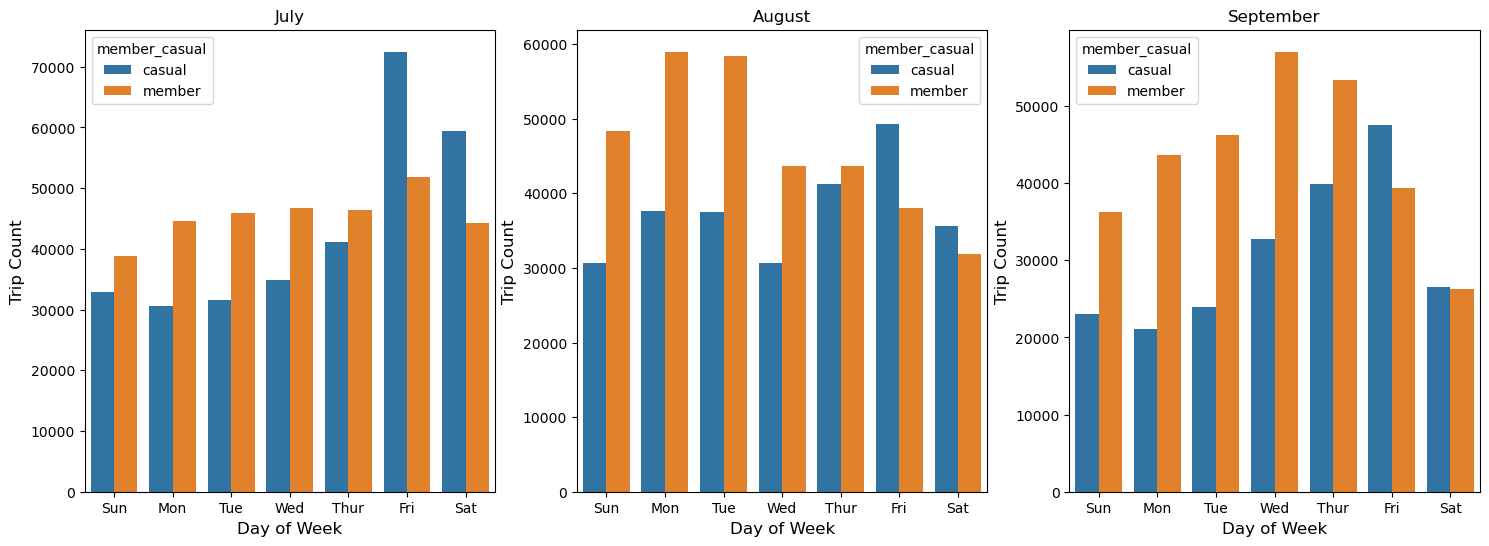

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = np.array(axes).flatten()
for m, ax in zip(dataset[dataset['Quarter']==3]['start_month_name'].unique(), axes):
    ax.set_title(m)
    
    sns.barplot(x='start_day_num', y='ride_id', hue='member_casual', 
    data=dataset[dataset['start_month_name']==m].groupby(['start_day_num', 'member_casual'])['ride_id'].count().reset_index(),ax=ax)
    ax.set_xlabel('Day of Week', fontsize=12)
    ax.set_ylabel('Trip Count', fontsize=12)
    ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ))

### Number of Trips at each day of the week by Member/Casual users
It can be that 'Members' use bike to work, the figure below confirms it. A sharp spike in the usage is observed at 7 am for 'Members', who probably are commuting to office during peak hours. Then a sharp decline is observed at 9 am once the offices start and then the usage remains consistent until 4 pm-5 pm when we see a sudden increase, slowly falling down during off-peak hours. If we presume that members are office going people, the bike usage between 10 am- 3 pm could possibly be by casual riders.

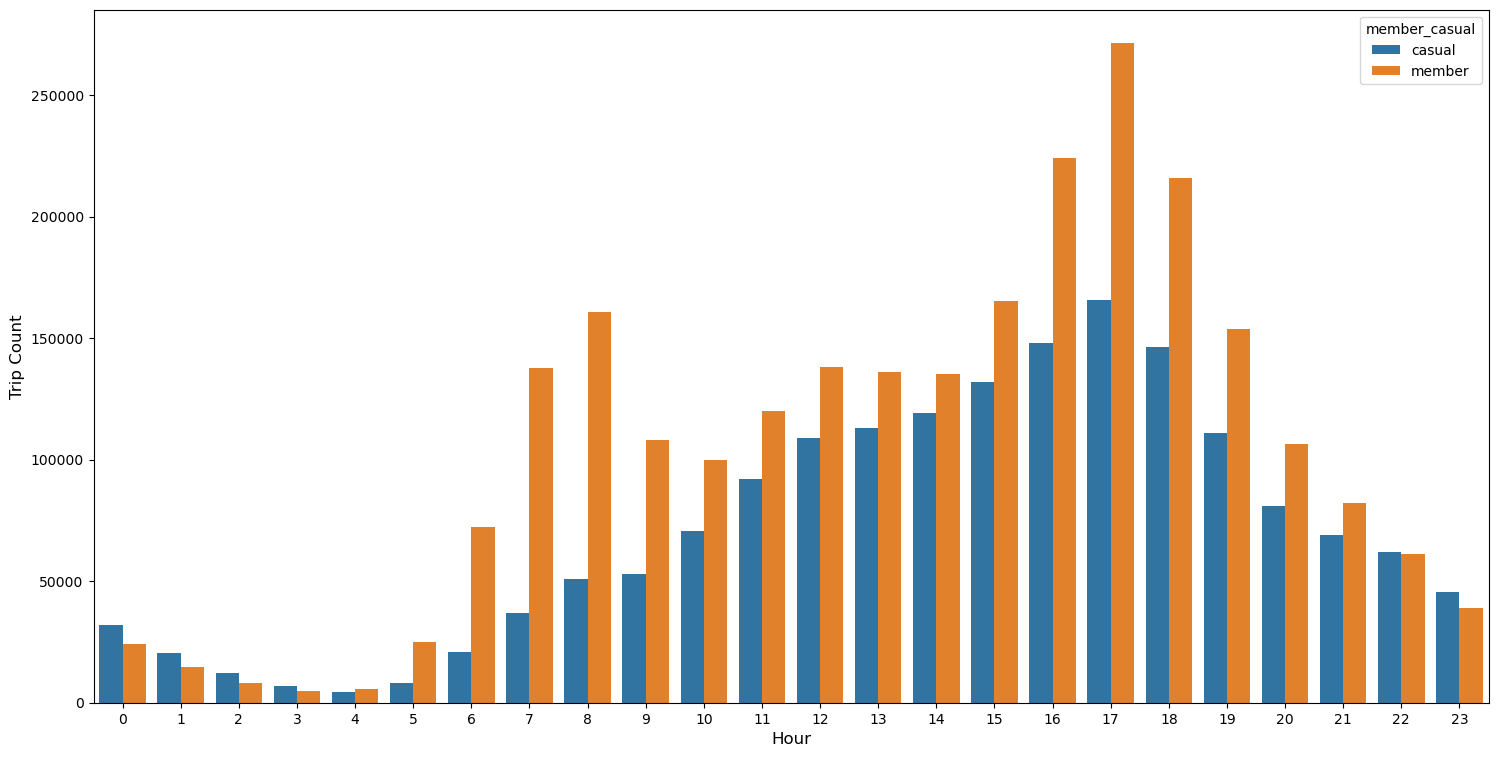

In [20]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(x='start_hour', y='ride_id', hue='member_casual', 
    data=dataset.groupby(['start_hour', 'member_casual'])['ride_id'].count().reset_index(), ax=ax)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Trip Count', fontsize=12)
plt.show()

### Number of Trips at each day of the week by Type of Bike

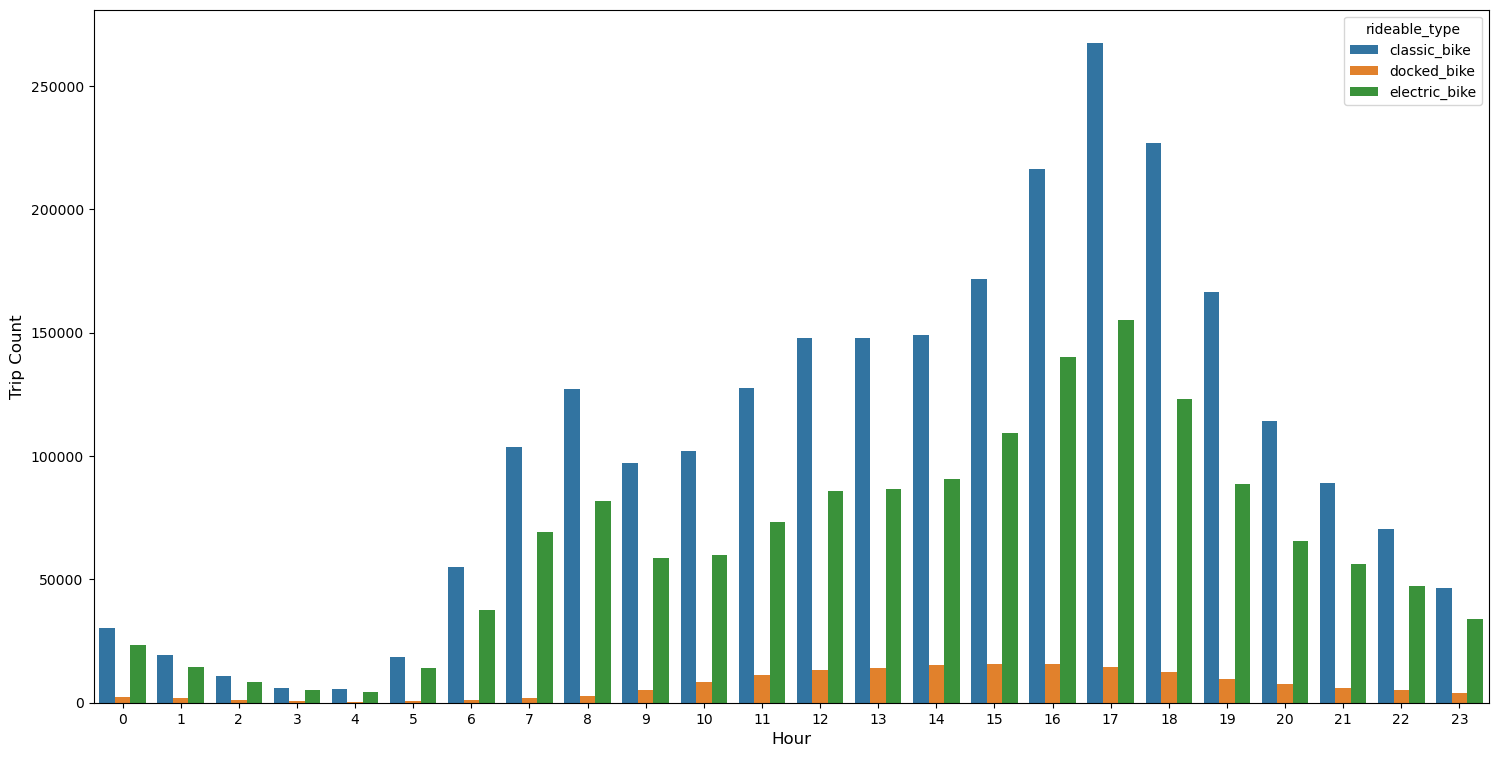

In [21]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(x='start_hour', y='ride_id', hue='rideable_type', 
    data=dataset.groupby(['start_hour', 'rideable_type'])['ride_id'].count().reset_index(), ax=ax)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Trip Count', fontsize=12)
plt.show()

### Importing weather dataset of Chicago for the year 2022
Weather data were collected from 'National Weather Service' for Chicago (2022) from this link: https://www.weather.gov/wrh/climate?wfo=lot

Weather data of each month of 2022 were than merged into a single CSV file named 'Chicago 2022 weather.csv'.
Date was converted into datetime type data and then grouped with each day's 'Average Temperature' and 'Pressure'

In [22]:
weather = pd.read_csv('C:\\Users\\ASUS\\MYNEWJN\\Chicago 2022 weather.csv')
weather["Date"] = pd.to_datetime(weather["Date"])
weather.dtypes

Date             datetime64[ns]
Max temp                  int64
Min temp                  int64
Avg temp                float64
Departure               float64
HDD                       int64
COD                       int64
Precipitation           float64
New Snow                float64
Snow Depth                int64
dtype: object

In [23]:
weather['Date'] = weather['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
temp_prep = weather.groupby([weather['Date']])['Avg temp', 'Precipitation'].mean()
temp_prep

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12764\1152940241.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp_prep = weather.groupby([weather['Date']])['Avg temp', 'Precipitation'].mean()


Avg temp  Precipitation
Date                               
2022-01-01      31.0           0.23
2022-01-02      20.5           0.04
2022-01-03      15.5           0.00
2022-01-04      28.5           0.00
2022-01-05      23.0           0.00
...              ...            ...
2022-12-27      16.5           0.00
2022-12-28      35.0           0.00
2022-12-29      51.0           0.00
2022-12-30      43.5           0.00
2022-12-31      32.5           0.00

[365 rows x 2 columns]

### Number of trips at each day of 2022

In [24]:
trip_per_day = dataset.groupby(dataset['Date'])['ride_id'].count()
trip_per_day

Date
2022-01-01    1683
2022-01-02    1382
2022-01-03    2245
2022-01-04    3228
2022-01-05    1901
              ... 
2022-12-27    1619
2022-12-28    3016
2022-12-29    4721
2022-12-30    4656
2022-12-31    3598
Name: ride_id, Length: 365, dtype: int64

### Total Trip Duration and Trip Distance at each day of 2022

In [25]:
trip_dd_per_day = dataset.groupby(dataset['Date'])['trip_duration', 'trip_distance'].sum()
trip_dd_per_day

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12764\1426176613.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trip_dd_per_day = dataset.groupby(dataset['Date'])['trip_duration', 'trip_distance'].sum()


trip_duration  trip_distance
Date                                    
2022-01-01   23708.400000    3273.484717
2022-01-02   19541.850000    2438.483437
2022-01-03   26690.650000    3924.352855
2022-01-04   36737.716667    5852.178589
2022-01-05   20164.233333    3165.802375
...                   ...            ...
2022-12-27   17145.716667    2649.385099
2022-12-28   36016.416667    5606.508272
2022-12-29   66913.350000    9511.248469
2022-12-30   62094.850000    8778.264312
2022-12-31   48373.550000    6591.694655

[365 rows x 2 columns]

In [26]:
trip_temp = pd.merge(trip_per_day, temp_prep, on="Date")
trip_temp

ride_id  Avg temp  Precipitation
Date                                        
2022-01-01     1683      31.0           0.23
2022-01-02     1382      20.5           0.04
2022-01-03     2245      15.5           0.00
2022-01-04     3228      28.5           0.00
2022-01-05     1901      23.0           0.00
...             ...       ...            ...
2022-12-27     1619      16.5           0.00
2022-12-28     3016      35.0           0.00
2022-12-29     4721      51.0           0.00
2022-12-30     4656      43.5           0.00
2022-12-31     3598      32.5           0.00

[365 rows x 3 columns]

### Merging Trip Duration, Trip Distance, Number of Trips, Daily Average Temperature and Pressure based on Date

In [27]:
w_trip = pd.merge(trip_dd_per_day, trip_temp, on="Date")
w_trip.rename(columns = {'ride_id': 'num_of_trips'}, inplace=True)
w_trip

trip_duration  trip_distance  num_of_trips  Avg temp  \
Date                                                               
2022-01-01   23708.400000    3273.484717          1683      31.0   
2022-01-02   19541.850000    2438.483437          1382      20.5   
2022-01-03   26690.650000    3924.352855          2245      15.5   
2022-01-04   36737.716667    5852.178589          3228      28.5   
2022-01-05   20164.233333    3165.802375          1901      23.0   
...                   ...            ...           ...       ...   
2022-12-27   17145.716667    2649.385099          1619      16.5   
2022-12-28   36016.416667    5606.508272          3016      35.0   
2022-12-29   66913.350000    9511.248469          4721      51.0   
2022-12-30   62094.850000    8778.264312          4656      43.5   
2022-12-31   48373.550000    6591.694655          3598      32.5   

            Precipitation  
Date                       
2022-01-01           0.23  
2022-01-02           0.04  
2022-01-03           0.00  
2022-01-04           0.00  
2022-01-05           0.00  
...                   ...  
2022-12-27           0.00  
2022-12-28           0.00  
2022-12-29           0.00  
2022-12-30           0.00  
2022-12-31           0.00  

[365 rows x 5 columns]

### Pair plot between Trip Duration, Trip Distance, Number of Trips, Daily Average Temperature and Pressure
The pairplot shows the variation in one variable with the change in others. For example, as the average temperature increases, the trip duartion also increases. The rate of increase is steeper towards higher temperature.

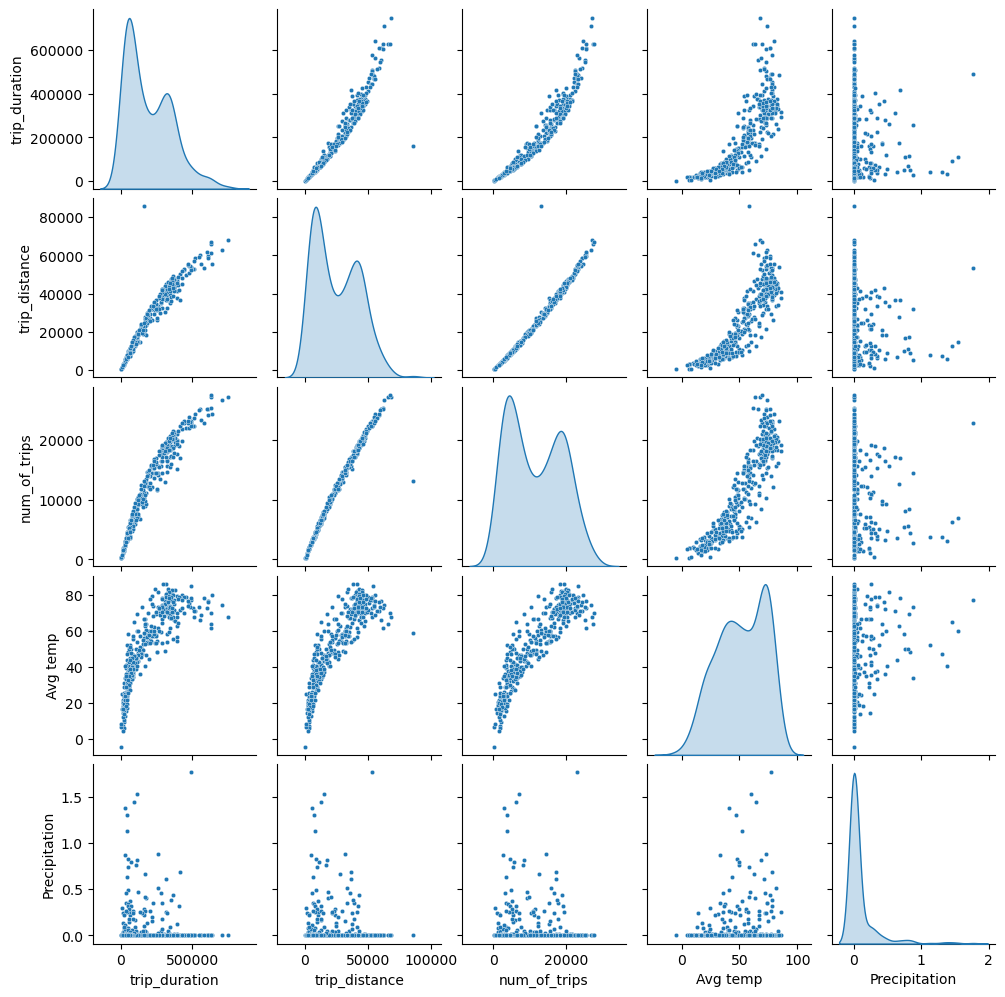

In [28]:
g = sns.pairplot(w_trip, diag_kind='kde', plot_kws={'s': 10})
g.fig.set_size_inches(10, 10)

### Number of Trips vs Average Temperature (F)
From the scatterplot, it can be seen that as temperature increases, the number of trips also increases. It is likely that an increase in temperature would lead to more people wanting to engage in outdoor activities, such as biking, as opposed to staying indoors. Additionally, warm weather may make biking a more comfortable and enjoyable experience, which could also contribute to an increase in bike trips.

<AxesSubplot:xlabel='Avg temp', ylabel='num_of_trips'>

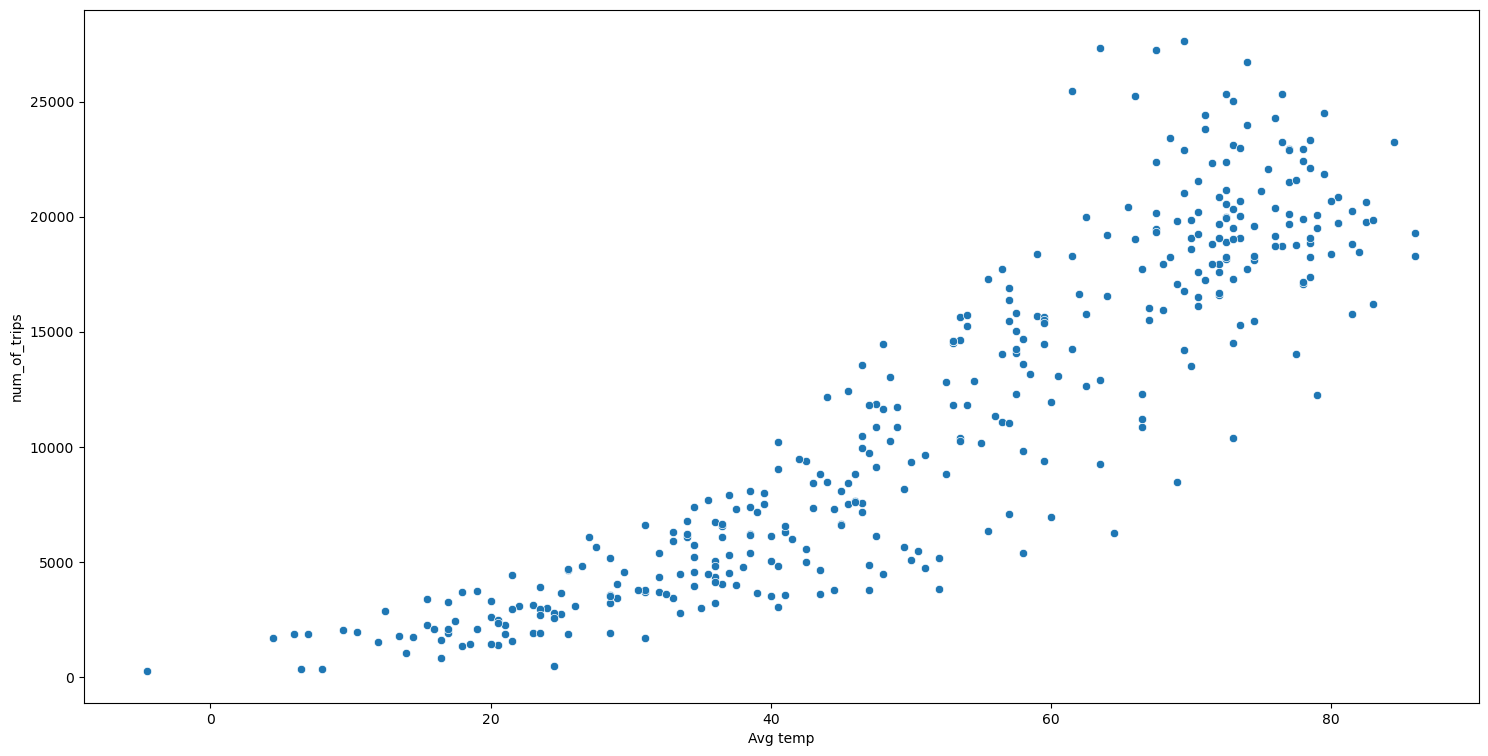

In [29]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.scatterplot(x='Avg temp', y='num_of_trips', data=w_trip)

### Correlation between Trip Duration, Trip Distance, Number of Trips, Daily Average Temperature and Pressure
From the correlation table and plot, it is seen that Trip Duration, Trip Distance, Number of Trips are highly correlated with Temperature. As temperature increaseses, these parameters also increases and vice-versa. But there is a low correlation between these variables with precipitation which is surprising. But this result makes sense because the data provided only gives an overall picture of the precipitation for each day at a specific location, which may not accurately reflect the precipitation experienced at different times of the day or at different locations. To understand the relationship between precipitation and bike ridership, it would be necessary to have more detailed precipitation data, such as hourly measurements, as well as data from multiple weather stations to account for variations across different regions.

In [30]:
w_trip.corr()

trip_duration  trip_distance  num_of_trips  Avg temp  \
trip_duration       1.000000       0.958226      0.962051  0.825017   
trip_distance       0.958226       1.000000      0.982602  0.873097   
num_of_trips        0.962051       0.982602      1.000000  0.900895   
Avg temp            0.825017       0.873097      0.900895  1.000000   
Precipitation      -0.110583      -0.127115     -0.128373  0.082819   

               Precipitation  
trip_duration      -0.110583  
trip_distance      -0.127115  
num_of_trips       -0.128373  
Avg temp            0.082819  
Precipitation       1.000000

<AxesSubplot:>

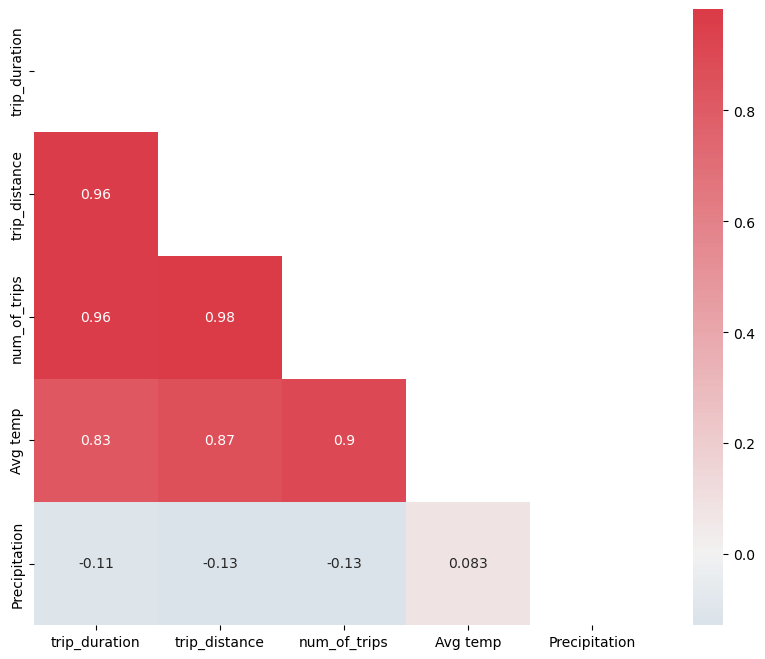

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

corr = w_trip.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(240, 10, as_cmap=True), center=0)

### Regression Plot between Number of Trips and Average Temperature

(0.0, 30000.0)

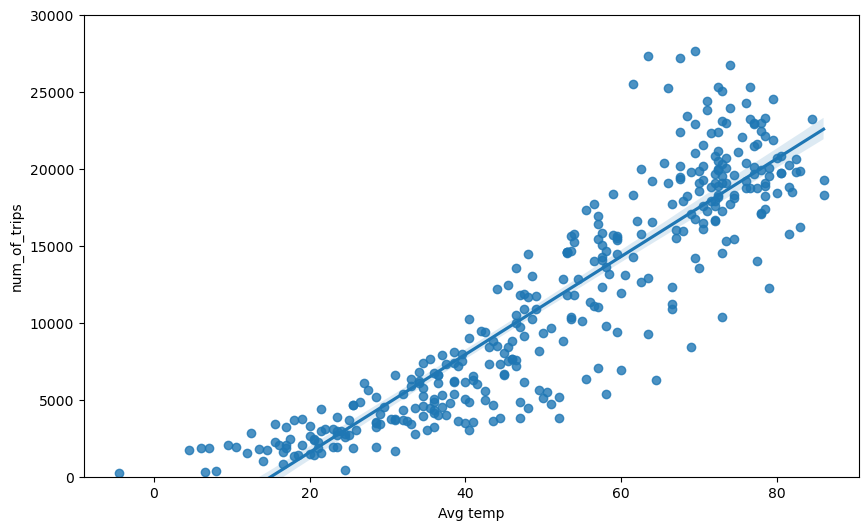

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x = 'Avg temp', y = 'num_of_trips', data=w_trip)
ax.set_ylim(0, 30000)

### The best fitted curve for determining approximate number of trips if average temperature is known:

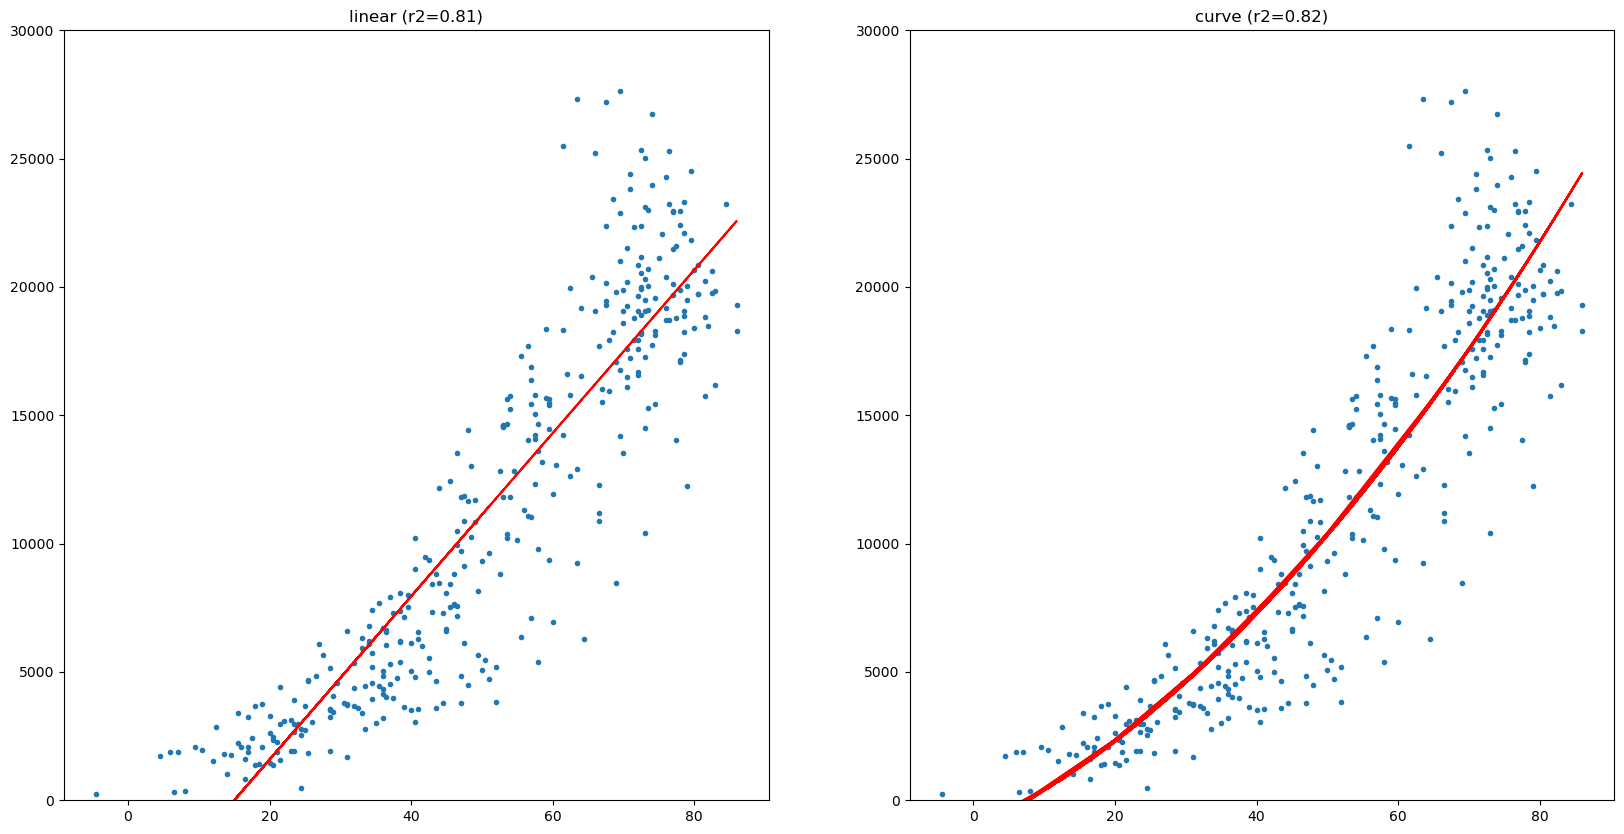

In [33]:
from scipy.optimize import curve_fit

# Define the curve fitting equations
def linear(x, m, b):
    return m*x + b
def curve(x, a, b, c):
    return a*x**2 + b*x + c

x = w_trip['Avg temp']
y = w_trip['num_of_trips']

# Estimate curve for each of the method used and graph the fitted curve
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for ax, func in zip(axes, [linear, curve]):
    popt, pcov = curve_fit(func, x, y, maxfev=5000)
    y_fit = func(x, *popt)
    
    r2 = 1 - (np.sum((y - y_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    
    popt
    ax.plot(x, y, '.')
    ax.plot(x, y_fit, 'r-')
    
    ax.set_ylim(0, 30000)
    ax.set_title('{0} (r2={1})'.format(func.__name__, np.round(r2, 2)))

### Best fitted Linear Regression Equation for finding number of trips using temperature

In [34]:
from sklearn.linear_model import LinearRegression

# Define the data points
x = w_trip[['Avg temp']]
y = w_trip['num_of_trips']

# Create a LinearRegression object
reg = LinearRegression().fit(x, y)

# Get the coefficients of the equation
coef = reg.coef_
intercept = reg.intercept_

# Print the equation
print("y = {:.2f}x + {:.2f}".format(coef[0], intercept))


y = 317.88x + -4771.55


### Number of Departure and Arrival Count at each station
It is seen that maximum number of trips were departed from the 'Streeter Dr & Grand Ave' station and arrived at the same station. The number is almost double of the 'DuSable Lake Shore Dr & Monroe St' station, which is second largest trip generation and attraction point. Some possible explanations may include the station's location in relation to popular destinations or tourist attractions, the availability of public transportation options nearby, the station's proximity to residential areas, and the station's overall accessibility and visibility. Additionally, it could also be that the area surrounding the station has more bike riders than other areas in Chicago.

In [35]:
start_station_count = dataset['start_station_name'].value_counts()
start_station_count = start_station_count.reset_index()
start_station_count.columns = ['Station Name', 'Departure Count']
start_station_count

Station Name  Departure Count
0                Streeter Dr & Grand Ave            69096
1      DuSable Lake Shore Dr & Monroe St            38065
2     DuSable Lake Shore Dr & North Blvd            36699
3                  Michigan Ave & Oak St            36230
4                  Wells St & Concord Ln            33505
...                                  ...              ...
1528            Pullman Community Center                1
1529              Michigan Ave & 96th St                1
1530                Drexel Ave & 87th St                1
1531              Corliss Ave & 133rd St                1
1532  Public Rack - 63rd & Western Ave S                1

[1533 rows x 2 columns]

<AxesSubplot:>

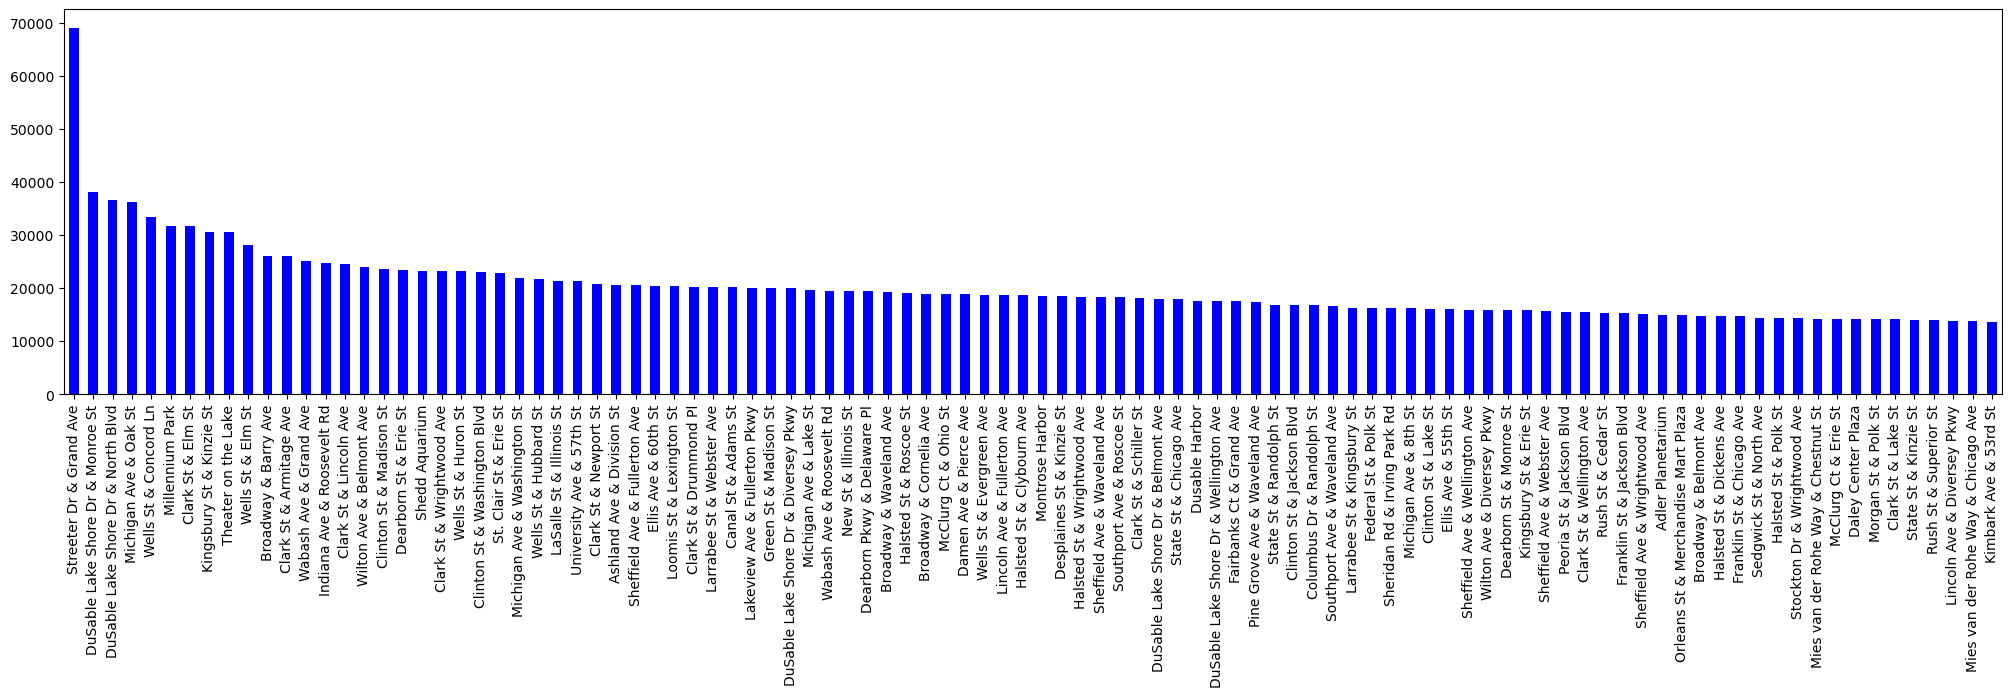

In [36]:
dataset['start_station_name'].value_counts().head(100).plot(kind = 'bar', figsize = (25, 5),  color = 'blue')

In [37]:
end_station_count = dataset['end_station_name'].value_counts()
end_station_count = end_station_count.reset_index()
end_station_count.columns = ['Station Name', 'Arrival Count']
end_station_count

Station Name  Arrival Count
0                    Streeter Dr & Grand Ave          70367
1         DuSable Lake Shore Dr & North Blvd          39536
2          DuSable Lake Shore Dr & Monroe St          37340
3                      Michigan Ave & Oak St          37298
4                      Wells St & Concord Ln          33797
...                                      ...            ...
1568                Kedzie & 103rd St - West              1
1569      Public Rack - Kedzie Ave & 61st Pl              1
1570            Park Manor Elementary School              1
1571                  Langley Ave & 105th Pl              1
1572  Public Rack - Commercial Ave & 89th St              1

[1573 rows x 2 columns]

<AxesSubplot:>

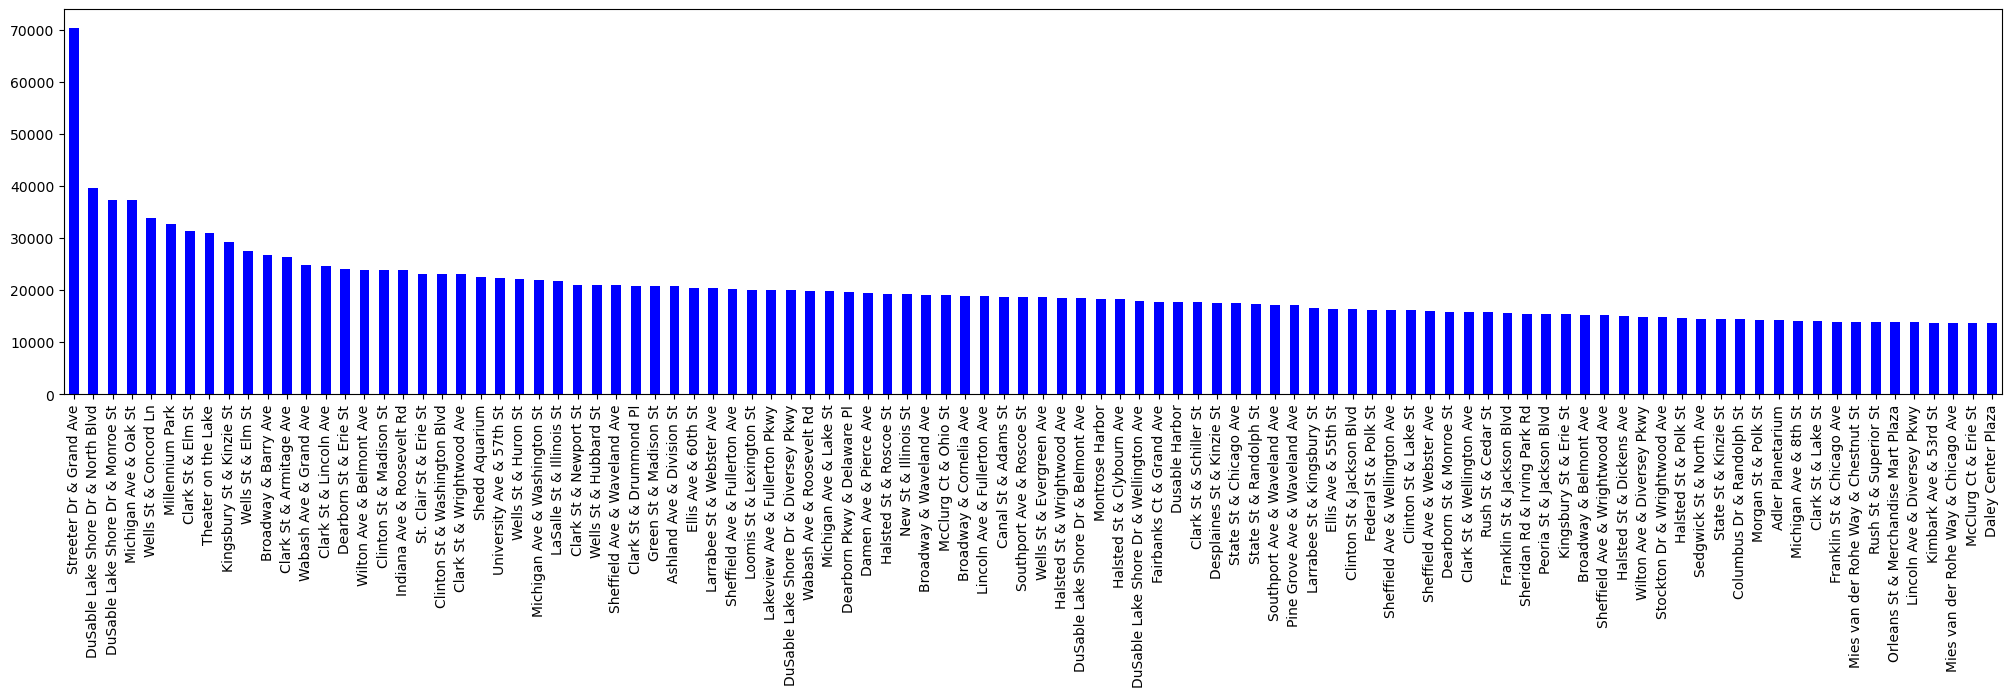

In [38]:
dataset['end_station_name'].value_counts().head(100).plot(kind = 'bar', figsize = (25, 5), color = 'blue' )

### Number of Trips from each invidual station to another
It can be seen that, maximum number of round trips were generated from 'Streeter Dr & Grand Ave' station.

In [39]:
x = pd.DataFrame(dataset.groupby(['start_station_name' ,'end_station_name']).size())
x = x.rename(columns = {0: 'Count'})
x = x.sort_values(['Count'], ascending = False)
x.head(10)

Count
start_station_name                end_station_name                        
Streeter Dr & Grand Ave           Streeter Dr & Grand Ave            10095
Ellis Ave & 60th St               University Ave & 57th St            6791
University Ave & 57th St          Ellis Ave & 60th St                 6359
Ellis Ave & 60th St               Ellis Ave & 55th St                 6356
DuSable Lake Shore Dr & Monroe St DuSable Lake Shore Dr & Monroe St   6236
Ellis Ave & 55th St               Ellis Ave & 60th St                 5714
DuSable Lake Shore Dr & Monroe St Streeter Dr & Grand Ave             5601
Michigan Ave & Oak St             Michigan Ave & Oak St               4619
Millennium Park                   Millennium Park                     3527
State St & 33rd St                Calumet Ave & 33rd St               3397

### Importing Divvy bike stations data that were in service in 2022
As the Divvy Bikeshare Dataset is based on individual trips rather than stations, the latitude and longutude data of the dataset seems ambigious. That's why data of Divvy Bike Stations that were in service in 2022 were collected from Chicago Data Portal.
(Website: https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations-In-Service/67g3-8ig8)

In [40]:
station = pd.read_csv('C:\\Users\\ASUS\\MYNEWJN\\Divvy_Bicycle_Stations.csv')
station

ID                             Station Name  Total Docks  \
0     1.590000e+18                   Troy St & Jackson Blvd            9   
1     6.410000e+02      Central Park Ave & Bloomingdale Ave           11   
2     1.680000e+18      Public Rack - Cornell Ave & 87th Pl            1   
3     3.670000e+02                     Racine Ave & 35th St           15   
4     1.670000e+18  Public Rack - Francisco Ave & Touhy Ave            2   
...            ...                                      ...          ...   
1411  2.000000e+01             Sheffield Ave & Kingsbury St           15   
1412  5.400000e+01                  Ogden Ave & Chicago Ave           19   
1413  6.930000e+02                  Baltimore Ave & 87th St           15   
1414  7.180000e+02             Ewing Ave & Burnham Greenway           11   
1415  7.620000e+02                   Green St & Randolph St           12   

      Docks in Service      Status   Latitude  Longitude  \
0                    9  In Service  41.877505 -87.704850   
1                   11  In Service  41.914166 -87.716755   
2                    1  In Service  41.736881 -87.583146   
3                   15  In Service  41.830689 -87.656211   
4                    2  In Service  42.011865 -87.701317   
...                ...         ...        ...        ...   
1411                15  In Service  41.910522 -87.653106   
1412                19  In Service  41.896362 -87.654061   
1413                15  In Service  41.737336 -87.548515   
1414                11  In Service  41.712749 -87.534814   
1415                12  In Service  41.883602 -87.648627   

                                      Location  
0                       (41.877505, -87.70485)  
1                      (41.914166, -87.716755)  
2                  (41.73688127, -87.58314552)  
3      (41.83068856472101, -87.65621066093445)  
4                      (42.011865, -87.701317)  
...                                        ...  
1411                   (41.910522, -87.653106)  
1412            (41.896362458, -87.6540612729)  
1413  (41.737335600416664, -87.54851460456847)  
1414   (41.71274876109496, -87.53481388092041)  
1415  (41.883601657275165, -87.64862671494483)  

[1416 rows x 8 columns]

### Merging total number of Departure from individual station with latitude and longitude data based on station's name

In [41]:
start_station_count["latitude"] = None
start_station_count["longitude"] = None

for i, row1 in start_station_count.iterrows():
    for j, row2 in station.iterrows():
        if row1["Station Name"] == row2["Station Name"]:
            start_station_count.at[i, "latitude"] = row2["Latitude"]
            start_station_count.at[i, "longitude"] = row2["Longitude"]
            break
            
start_station_count = start_station_count.dropna(how='any',axis=0)
start_station_count

Station Name  Departure Count  \
0                               Streeter Dr & Grand Ave            69096   
1                     DuSable Lake Shore Dr & Monroe St            38065   
2                    DuSable Lake Shore Dr & North Blvd            36699   
3                                 Michigan Ave & Oak St            36230   
4                                 Wells St & Concord Ln            33505   
...                                                 ...              ...   
1518                  Public Rack - 10557 S Western Ave                1   
1519                 Public Rack - Keeler Ave & 26th St                1   
1522  Public Rack - Spencer Elementary Technology Ac...                1   
1526                Public Rack - Langley Ave & 87th St                1   
1532                 Public Rack - 63rd & Western Ave S                1   

       latitude  longitude  
0     41.892278 -87.612043  
1     41.880958 -87.616743  
2     41.911722 -87.626804  
3      41.90096 -87.623777  
4     41.912133 -87.634656  
...         ...        ...  
1518  41.701719  -87.68128  
1519  41.844058 -87.729873  
1522  41.884655 -87.750498  
1526  41.735828 -87.606981  
1532  41.779196 -87.683589  

[1175 rows x 4 columns]

### Merging total number of Arrival at individual station with latitude and longitude data based on station's name

In [42]:
end_station_count["latitude"] = None
end_station_count["longitude"] = None

for i, row1 in end_station_count.iterrows():
    for j, row2 in station.iterrows():
        if row1["Station Name"] == row2["Station Name"]:
            end_station_count.at[i, "latitude"] = row2["Latitude"]
            end_station_count.at[i, "longitude"] = row2["Longitude"]
            break
            
end_station_count = end_station_count.dropna(how='any',axis=0)
end_station_count

Station Name  Arrival Count   latitude  \
0                      Streeter Dr & Grand Ave          70367  41.892278   
1           DuSable Lake Shore Dr & North Blvd          39536  41.911722   
2            DuSable Lake Shore Dr & Monroe St          37340  41.880958   
3                        Michigan Ave & Oak St          37298   41.90096   
4                        Wells St & Concord Ln          33797  41.912133   
...                                        ...            ...        ...   
1549       Public Rack - Langley Ave & 87th St              1  41.735828   
1557            Public Rack - Ave L & 105th St              1  41.703542   
1561       Public Rack - Crandon Ave & 80th St              1  41.749519   
1564  Public Rack - Central Park Ave & 16th St              1  41.858938   
1572    Public Rack - Commercial Ave & 89th St              1  41.733543   

      longitude  
0    -87.612043  
1    -87.626804  
2    -87.616743  
3    -87.623777  
4    -87.634656  
...         ...  
1549 -87.606981  
1557 -87.536634  
1561 -87.568831  
1564 -87.715727  
1572 -87.551152  

[1201 rows x 4 columns]

### Plotting the Trip Generation Point on Map
It is seen that most bike stations from which trip started are located near North Side, Logan Square, Lincon Park, West Town and their nearby area. It seems most of the population of the city lives near these areas. Census data would verify that.

In [43]:
import folium
from folium.plugins import MarkerCluster, HeatMap

chicago_map3 = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

marker_cluster = MarkerCluster().add_to(chicago_map3)

for i, row in start_station_count.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]],
                  popup=row['Station Name']).add_to(marker_cluster)

chicago_map3

### Heatmap of Trip Generation
The heatmap of trip generation also supports the statement

In [44]:
chicago_map4 = folium.Map(location=[41.8781, -87.6298], zoom_start=13)

marker_cluster = MarkerCluster().add_to(chicago_map4)
HeatMap(data=start_station_count[['latitude', 'longitude']], name='Departure Count').add_to(chicago_map4)

chicago_map4

### Plotting the Trip Attraction Point on Map
It is seen that most bike stations at which trips ended are located  near Loop, Lake View, Near West Side, North Lawndale, West Town and their nearby area. It seems like these areas are the working hub and business center of the city.

In [45]:
chicago_map5 = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

marker_cluster = MarkerCluster().add_to(chicago_map5)

for i, row in end_station_count.iterrows():
    folium.Marker(location=[row["latitude"], row["longitude"]],
                  popup=row['Station Name']).add_to(marker_cluster)

chicago_map5

### Heatmap of Trip Attraction
The heatmap of trip attraction also supports the previous statement

In [46]:
chicago_map6 = folium.Map(location=[41.8781, -87.6298], zoom_start=13)

marker_cluster = MarkerCluster().add_to(chicago_map6)
HeatMap(data=end_station_count[['latitude', 'longitude']], name='Arrival Count').add_to(chicago_map6)

chicago_map6

### Bike Station's location distribution based on GPS coordinates
The distribution reavels that most of the bike stations are located from approximate latitude 41.85 to 41.92 and from approximate longitude -87.62 to -87.67. These locations include Loop, West Loop, Streeterville, Millennium Park, Willis Tower, the Art Institute of Chicago etc. and their nearby area. Disadvantaged area in terms of bike stations can also be understood from these plots.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


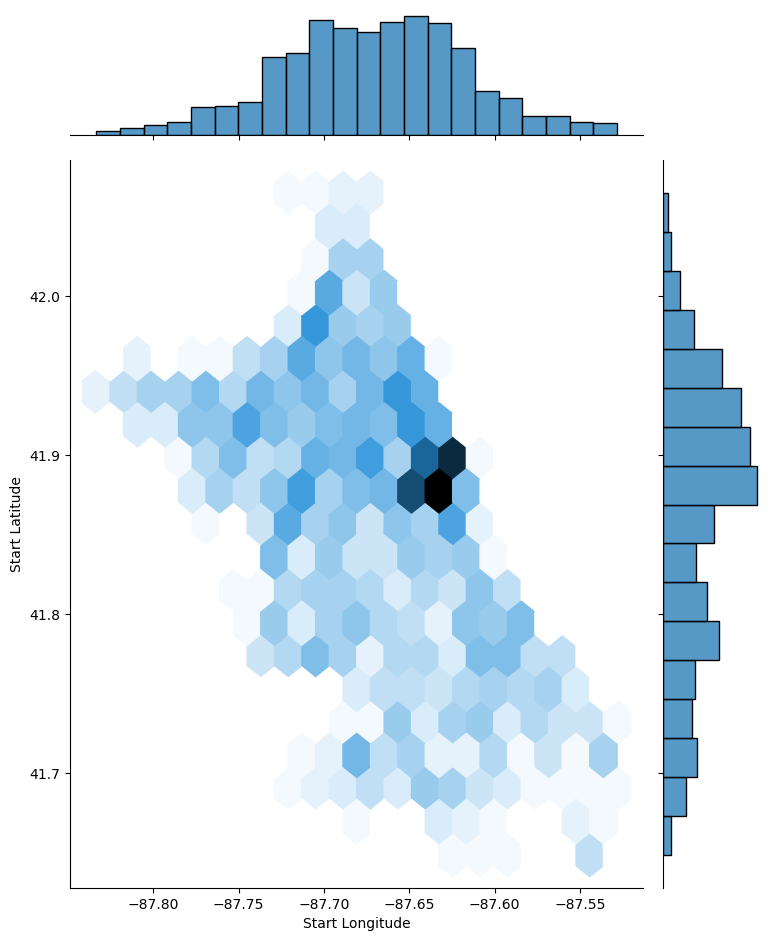

In [47]:
# trip start longitude and latitude distribution
g = sns.jointplot('longitude', 'latitude', data=start_station_count, kind='hex')
g.set_axis_labels('Start Longitude', 'Start Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


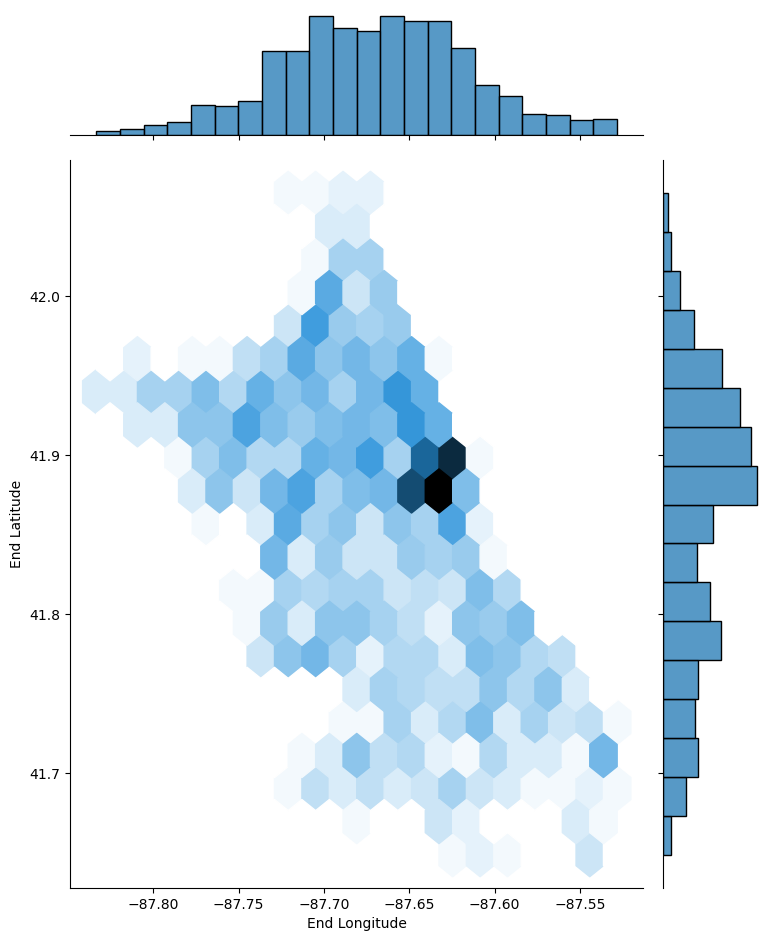

In [48]:
# trip end longitude and latitude distribution
g = sns.jointplot('longitude', 'latitude', data=end_station_count, kind='hex')
g.set_axis_labels('End Longitude', 'End Latitude')
g.fig.set_figwidth(8)
g.fig.set_figheight(10)
plt.show()

### Number of Arrival and Departure at each station at any specific hour of day
As most number of the trips occurs from 4 PM to 5 PM  during a day, the total number of arrival and departure at eevery station at that time are computed. It can also be done for any hour of the day.

In [49]:
def get_trip_counts_by_hour(selected_hour):
    locations = dataset.groupby("start_station_id").first()
    locations = locations.loc[:, ["start_lat",
                                 "start_lng",
                                 "start_station_name"]]

    subset = dataset[dataset["start_hour"]==selected_hour]

    departure_counts =  subset.groupby("start_station_id").count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]

    arrival_counts =  subset.groupby("end_station_id").count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

get_trip_counts_by_hour(17)

Departure Count  start_lat  start_lng  \
start_station_id                                          
021320                         40  41.890000 -87.680000   
1011                            2  41.920000 -87.790000   
1019                            5  41.930000 -87.740000   
1022                            1  41.720000 -87.540000   
1033                            1  41.770000 -87.720000   
...                           ...        ...        ...   
chargingstx07                  58  41.881827 -87.648832   
chargingstx1                 1193  41.918296 -87.652183   
chargingstx3                  919  41.883602 -87.648627   
chargingstx4                  680  41.885492 -87.652289   
chargingstx5                  576  41.943350 -87.670668   

                                              start_station_name  \
start_station_id                                                   
021320                                            MTV Hubbard St   
1011              Public Rack - Fullerton Ave & Narragansett Ave   
1019                    Public Rack - Kostner Ave & Diversey Ave   
1022                         Public Rack - Ewing Ave & 96th St S   
1033                          Public Rack - Pulaski Rd & 65th St   
...                                                          ...   
chargingstx07                            Green St & Madison Ave*   
chargingstx1                          Bissell St & Armitage Ave*   
chargingstx3                             Green St & Randolph St*   
chargingstx4                                Morgan St & Lake St*   
chargingstx5                            Lincoln Ave & Roscoe St*   

                  Arrival Count  
start_station_id                 
021320                      4.0  
1011                        4.0  
1019                        2.0  
1022                        NaN  
1033                        NaN  
...                         ...  
chargingstx07              71.0  
chargingstx1             1186.0  
chargingstx3             1015.0  
chargingstx4              505.0  
chargingstx5              684.0  

[998 rows x 5 columns]

### Net Departure at any specific hour of day
Net departure was calculated for each station by subtracting the total number of arrival from the total number of departure at any specific hour of the day.

In [50]:
def plot_station_counts(trip_counts):
    folium_map = folium.Map(location=[41.8781, -87.6298],
                            zoom_start=13,
                            width='50%')

    for index, row in trip_counts.iterrows():
        net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        popup_text = "{}<br> total arrivals: {}<br> total departures: {}<br> net departures: {}"
        popup_text = popup_text.format(row["start_station_name"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        radius = net_departures/20
 
        if net_departures>0:
            # color="#FFCE00" # orange
            # color="#007849" # green
            color="#E37222" # tangerine
        else:
            # color="#0375B4" # blue
            # color="#FFCE00" # yellow            
            color="#0A8A9F" # teal

        folium.CircleMarker(location=(row["start_lat"],
                                      row["start_lng"]),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

### Net departures and activity from each station at 8 AM (Morning Peak)
It can be seen that almost every stations around the city has net activity near the morning peak time (8 AM). But most number of net departure is seen at 'Indiana Ave & Roosevelt Rd' station with total arrivals: 509.0, total departures: 1567, and net departures: 1058.0, making it the most active station at morning peak hour.

In [51]:
# plot net departures at 8 AM

trip_counts = get_trip_counts_by_hour(8)
plot_station_counts(trip_counts)

### Net departures and activity from each station at 5 AM (Evening Peak)
Most number of net departure is seen at 'Franklin St & Monroe St' station with total arrivals: 317.0, total departures: 2105, and net departures: 1788.0, making it the most active station at evening peak hour.

In [52]:
# plot net departures at 5 PM

trip_counts = get_trip_counts_by_hour(17)
folium_map = plot_station_counts(trip_counts)
folium_map